In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-11-15 10:55:19.093725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 10:55:20.004849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
dataset_take = 7500
learning_rate = 1.5e-3
batch_per_file_size = 8
node_embedding_size = 16
layers = [154, 77, 40, 44, 29]

dataset = LayoutDataset(
    batch_size, dataset_take,
    build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

2023-11-15 10:55:22.962549: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 10:55:23.074275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 10:55:23.074511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

train layout:nlp:default 7500 False
train layout:nlp:random 7500 False
train layout:xla:random 7500 True
train layout:xla:default 7500 True
test all_filenames 10000 False
valid all_filenames 1000 False


In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    batch_per_file_size=batch_per_file_size,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=5,
    layer_sizes=layers,
    loss='pairwise_hinge',
    n_siblings=dataset.n_siblings,
    l1_multiplier=2e-8,
    output_name='layout_11_14_22_30'
)

In [4]:
mlp.train(dataset, None)

2023-11-15 10:58:15.685755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-15 10:58:15.718369: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7a74667890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-15 10:58:15.718509: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-15 10:58:15.739488: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-15 10:58:15.968735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-15 10:58:16.124664: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 3.2649205 lr 0.00007
iteration 1000 training loss 3.285402 lr 0.00015
iteration 1500 training loss 2.6715038 lr 0.00022
iteration 2000 training loss 2.580038 lr 0.00030
iteration 2500 training loss 1.9565408 lr 0.00037
iteration 3000 training loss 2.2767081 lr 0.00045
iteration 3500 training loss 2.1766846 lr 0.00052
iteration 4000 training loss 1.7156907 lr 0.00060
iteration 4500 training loss 1.7387638 lr 0.00067
iteration 5000 training loss 1.9093956 lr 0.00075
iteration 5500 training loss 2.0644252 lr 0.00082
iteration 6000 training loss 1.5960631 lr 0.00090
iteration 6500 training loss 1.4804713 lr 0.00097
iteration 7000 training loss 2.0933907 lr 0.00105
iteration 7500 training loss 1.9983369 lr 0.00112
iteration 8000 training loss 1.525287 lr 0.00120
iteration 8500 training loss 2.219039 lr 0.00127
iteration 9000 training loss 1.5576627 lr 0.00135
iteration 9500 training loss 1.5578576 lr 0.00142
iteration 10000 training loss 1.8833685 lr 0.00150
layo

iteration 70000 training loss 0.80751604 lr 0.00131
layout:nlp:random 0.9259285652189491
layout:nlp:default 0.4983752175883856
layout:xla:random 0.6408768393262491
layout:xla:default 0.34712271606684253
epoch 0, it 70000 validation loss -0.603
iteration 70500 training loss 1.0517981 lr 0.00130
iteration 71000 training loss 0.8425333 lr 0.00130
iteration 71500 training loss 0.9371797 lr 0.00130
iteration 72000 training loss 0.8195532 lr 0.00129
iteration 72500 training loss 1.0389539 lr 0.00129
iteration 73000 training loss 1.0396343 lr 0.00129
iteration 73500 training loss 1.3871534 lr 0.00128
iteration 74000 training loss 1.6562682 lr 0.00128
iteration 74500 training loss 0.9161432 lr 0.00128
iteration 75000 training loss 1.0746691 lr 0.00128
iteration 75500 training loss 1.2321249 lr 0.00127
iteration 76000 training loss 0.8347541 lr 0.00127
iteration 76500 training loss 1.0053667 lr 0.00127
iteration 77000 training loss 1.5293018 lr 0.00126
iteration 77500 training loss 1.0538604 lr

iteration 136500 training loss 0.7512095 lr 0.00077
iteration 137000 training loss 0.743983 lr 0.00077
iteration 137500 training loss 1.387356 lr 0.00077
iteration 138000 training loss 1.1211566 lr 0.00076
iteration 138500 training loss 1.1290066 lr 0.00076
iteration 139000 training loss 0.9761913 lr 0.00075
iteration 139500 training loss 1.5456865 lr 0.00075
iteration 140000 training loss 0.9414764 lr 0.00074
layout:nlp:random 0.9354920475652648
layout:nlp:default 0.5070189241256429
layout:xla:random 0.6539112665635761
layout:xla:default 0.3422516128731941
epoch 0, it 140000 validation loss -0.610
iteration 140500 training loss 1.4873565 lr 0.00074
iteration 141000 training loss 0.5836963 lr 0.00073
iteration 141500 training loss 0.8301652 lr 0.00073
iteration 142000 training loss 1.02268 lr 0.00072
iteration 142500 training loss 0.69606286 lr 0.00072
iteration 143000 training loss 1.0980197 lr 0.00072
iteration 143500 training loss 1.1113191 lr 0.00071
iteration 144000 training loss 

iteration 202500 training loss 1.039483 lr 0.00025
iteration 203000 training loss 1.4541632 lr 0.00025
iteration 203500 training loss 0.69291043 lr 0.00025
iteration 204000 training loss 0.6541048 lr 0.00024
iteration 204500 training loss 1.0480729 lr 0.00024
iteration 205000 training loss 0.8656259 lr 0.00024
iteration 205500 training loss 1.1542027 lr 0.00024
iteration 206000 training loss 0.8634796 lr 0.00023
iteration 206500 training loss 0.8616569 lr 0.00023
iteration 207000 training loss 0.69159657 lr 0.00023
iteration 207500 training loss 1.3065028 lr 0.00022
iteration 208000 training loss 0.8975785 lr 0.00022
iteration 208500 training loss 0.76462275 lr 0.00022
iteration 209000 training loss 0.70350796 lr 0.00022
iteration 209500 training loss 0.6367679 lr 0.00021
iteration 210000 training loss 1.2979727 lr 0.00021
layout:nlp:random 0.9425367787163678
layout:nlp:default 0.5040449218631522
layout:xla:random 0.6571052448933078
layout:xla:default 0.37553876266787883
epoch 0, it 21

layout:nlp:random 0.9445769940143942
layout:nlp:default 0.5062164858133732
layout:xla:random 0.6641591762973765
layout:xla:default 0.37627047024787136
epoch 0, it 270000 validation loss -0.623
iteration 270500 training loss 0.85144645 lr 0.00008
iteration 271000 training loss 0.6852646 lr 0.00008
iteration 271500 training loss 0.41791266 lr 0.00008
iteration 272000 training loss 0.82633656 lr 0.00008
iteration 272500 training loss 1.0228564 lr 0.00008
iteration 273000 training loss 1.1662928 lr 0.00008
iteration 273500 training loss 0.7955035 lr 0.00008
iteration 274000 training loss 0.75595975 lr 0.00008
iteration 274500 training loss 1.2372514 lr 0.00008
iteration 275000 training loss 0.5449502 lr 0.00008
iteration 275500 training loss 0.94449866 lr 0.00008
iteration 276000 training loss 0.83025306 lr 0.00008
iteration 276500 training loss 1.1269954 lr 0.00008
iteration 277000 training loss 0.98389065 lr 0.00008
iteration 277500 training loss 1.2460296 lr 0.00008
iteration 278000 tra

KeyboardInterrupt: 

In [5]:
mlp.best_val_subsets

{'layout:nlp:random': 0.9466170814059568,
 'layout:nlp:default': 0.5089615836755772,
 'layout:xla:random': 0.6641591762973765,
 'layout:xla:default': 0.3827039969575288}

In [6]:
np.mean(list(mlp.best_val_subsets.values()))

0.6256104595841098

## Evaluate validation set

In [7]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

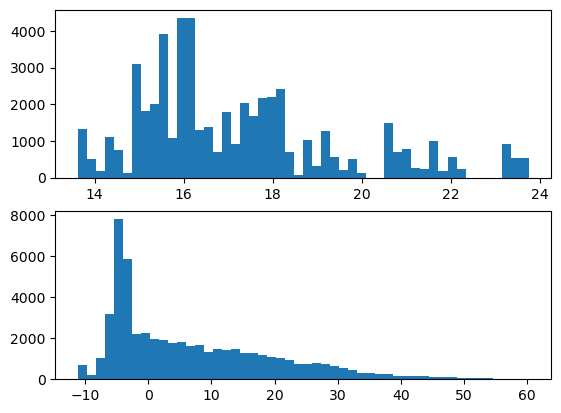

In [8]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [9]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

,ID,config_index,prediction,target
ID,,,,
b'layout:xla:random:resnet50.4x4.fp16',b'layout:xla:random:resnet50.4x4.fp16',15,-11.165692,19.288380
b'layout:xla:default:resnet50.4x4.fp16',b'layout:xla:default:resnet50.4x4.fp16',4,-10.458331,19.288345
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size',b'layout:xla:default:tf2_bert_pretrain_dynamic...,25,-9.392967,17.943745
b'layout:xla:default:bert_pretraining.4x4.fp16',b'layout:xla:default:bert_pretraining.4x4.fp16',24,-8.553842,17.647287
b'layout:xla:random:resnet_v1_50_official_batch_128_bf16',b'layout:xla:random:resnet_v1_50_official_batc...,19,-8.110926,20.910173
b'layout:xla:default:resnet_v1_50_official_batch_128_bf16',b'layout:xla:default:resnet_v1_50_official_bat...,18,-7.774381,20.910114
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train',b'layout:nlp:default:small_bert_bert_en_uncase...,191,-7.195317,15.861813
b'layout:xla:random:tf2_bert_pretrain_dynamic_batch_size',b'layout:xla:random:tf2_bert_pretrain_dynamic_...,14,-6.901940,17.944567
b'layout:xla:default:inception_v3_batch_128_train',b'layout:xla:default:inception_v3_batch_128_tr...,10,-6.887579,21.680351


Text(0.5, 1.0, "b'layout:xla:random:resnet50.4x4.fp16'")

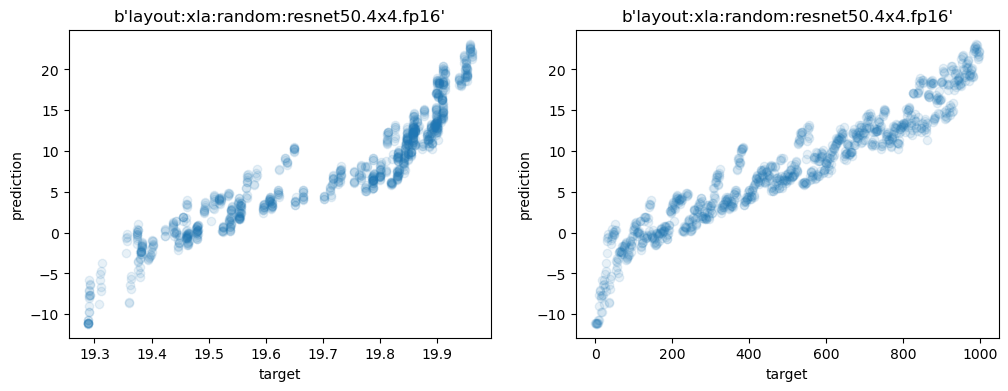

In [10]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1_000)
graph_id = np.random.choice(val_df['ID'].unique())
#graph_id = b'layout:xla:default:inception_v3_batch_128_train'
#graph_id = b'layout:xla:default:unet_3d.4x4.bf16'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

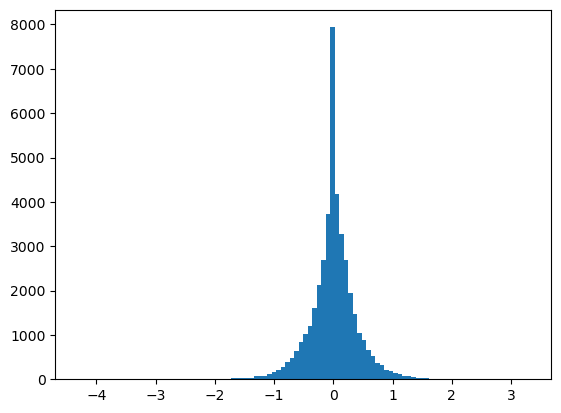

In [14]:
plt.hist(mlp.dense_layer_node_1.kernel.numpy().flatten(), bins=100);

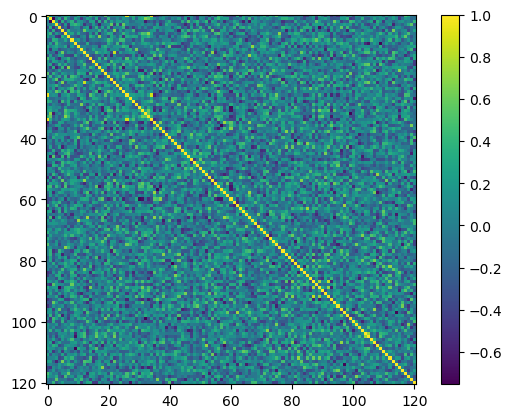

In [12]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [13]:
ind = np.unravel_index(np.argsort(dots.flatten())[-127], dots.shape)
ind

(34, 26)

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [15]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [16]:
val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
layout:nlp:default:albert_en_xlarge_batch_size_16_test                               33294;46881;17179;36699;39098;38016;32153;3215...
layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test                  63858;66408;19023;42031;72813;77065;20295;8029...
layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train              21913;15758;21837;25646;22623;17422;22556;1559...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test      2526;30104;65139;30076;2517;72228;199;30275;73...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train     49444;49422;17407;42936;42927;11941;41024;3600...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test      91739;36691;74797;71482;40721;70258;29831;3236...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train     41648;38810;38112;23068;25765;11591;25889;2322...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H

In [17]:
val_df

,ID,config_index,prediction,target
0,b'layout:nlp:random:small_bert_bert_en_uncased...,67441,13.173551,13.888126
1,b'layout:nlp:default:small_bert_bert_en_uncase...,39371,-4.379457,17.015715
2,b'layout:nlp:default:small_bert_bert_en_uncase...,45383,-4.033183,16.102400
3,b'layout:nlp:random:small_bert_bert_en_uncased...,66269,28.651779,15.551062
4,b'layout:nlp:default:small_bert_bert_en_uncase...,45141,-4.229255,15.973487
...,...,...,...,...
53476,b'layout:xla:default:mlperf_bert_batch_24_2x2',3638,1.677686,23.315170
53477,b'layout:nlp:default:small_bert_bert_en_uncase...,28919,-3.850001,15.198936
53478,b'layout:nlp:random:small_bert_bert_en_uncased...,91927,8.743223,16.071648
53479,b'layout:nlp:random:small_bert_bert_en_uncased...,4662,36.815292,16.433245


In [18]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

array(['layout:nlp:random', 'layout:nlp:default', 'layout:xla:default',
       'layout:xla:random'], dtype=object)

In [19]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
all_means = []
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    all_means.append(mean)
    print(subset, mean)
print(np.mean(all_means))

layout:nlp:random 0.9458701127611728
layout:nlp:default 0.5061517319536221
layout:xla:default 0.37408806400434397
layout:xla:random 0.6589935221494645
0.6212758577171509


In [ ]:
np.mean([
    0.9235,
    0.6591,
    0.516,
    0.358,
    0.968
])

In [20]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

ID
b'layout:xla:default:unet_3d.4x4.bf16'                                                  0.019638
b'layout:xla:random:unet_3d.4x4.bf16'                                                   0.200991
b'layout:xla:default:mlperf_bert_batch_24_2x2'                                          0.202618
b'layout:xla:default:resnet_v1_50_official_batch_128_bf16'                              0.323885
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size'                              0.358771
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-512_A-8_batch_size_64_test'      0.398264
b'layout:nlp:default:small_bert_bert_en_uncased_L-4_H-512_A-8_batch_size_32_train'      0.403783
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_64_train'      0.403916
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train'      0.444615
b'layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train'              0.458891
b'layout:nlp:default:small_

In [ ]:
valid_nodes_list = []
for batch in dataset.valid_data:
    df = pd.DataFrame(
        np.stack([
            batch['layout_id'].numpy(), 
            batch['valid_nodes'].numpy()], axis=-1),
        columns=['ID', 'valid_nodes']
    ).drop_duplicates('ID')
    valid_nodes_list.append(df)
valid_nodes = pd.concat(valid_nodes_list).drop_duplicates('ID')
valid_nodes

In [ ]:
valid_nodes.set_index('ID', inplace=True)
valid_nodes['scores'] = val_scores
valid_nodes

In [ ]:
valid_nodes.reset_index(inplace=True)
valid_nodes

In [ ]:
valid_nodes['subset'] = valid_nodes['ID'].apply(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
valid_nodes

In [ ]:
plt.scatter(
    valid_nodes['scores'],
    valid_nodes['valid_nodes']
)

In [ ]:
subset = 'layout:xla:random'
valid_nodes_subset = valid_nodes[valid_nodes['subset'] == subset]
print(valid_nodes_subset.sort_values('valid_nodes').iloc[-1])
plt.scatter(
    valid_nodes_subset['scores'],
    valid_nodes_subset['valid_nodes']
)

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [22]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'layout:nlp:default:d15316c12eefdef1ba549eb43...,0,-2.952229
1,b'layout:nlp:default:32531d07a084b319dce484f53...,0,3.445101
2,b'layout:xla:random:937ee0eb0d5d6151b7b8252933...,0,20.901833
3,b'layout:nlp:default:f6c146fc5cf10be4f3accbaca...,0,-3.936913
4,b'layout:xla:default:fbaa8bb6a1aed9988281085c9...,0,-1.352433
...,...,...,...
49997,b'layout:nlp:random:60880ed76de53f4d7a1b960b24...,999,27.318993
49998,b'layout:nlp:random:016ac66a44a906a695afd22285...,999,10.513089
49999,b'layout:nlp:random:29886a50d55cfe77a9497bc906...,999,7.372784
50000,b'layout:xla:random:937ee0eb0d5d6151b7b8252933...,1000,0.263130


In [23]:
test_df.groupby('ID').count()

,config_index,prediction
ID,,
b'layout:nlp:default:016ac66a44a906a695afd2228509046a',1000,1000
b'layout:nlp:default:171b0513d8874a427ccfa46d136fbadc',1000,1000
b'layout:nlp:default:23559853d9702baaaacbb0c83fd32266',1000,1000
b'layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9',1000,1000
b'layout:nlp:default:32531d07a084b319dce484f53a4cf3fc',1000,1000
b'layout:nlp:default:38524e2ff135ded55b5286407e7af6b7',1000,1000
b'layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba',1001,1001
b'layout:nlp:default:492c7a94d559aa4a88769142d2a68362',1000,1000
b'layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad',1000,1000


In [24]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
layout:nlp:default:016ac66a44a906a695afd2228509046a    302;742;476;338;896;565;192;26;20;801;54;485;3...
layout:nlp:default:171b0513d8874a427ccfa46d136fbadc    44;361;586;519;166;927;206;431;21;15;412;867;1...
layout:nlp:default:23559853d9702baaaacbb0c83fd32266    214;786;947;417;112;842;825;48;447;852;991;396...
layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9    79;389;590;888;952;315;23;762;547;532;868;778;...
layout:nlp:default:32531d07a084b319dce484f53a4cf3fc    151;584;869;724;26;64;102;242;969;535;513;487;...
layout:nlp:default:38524e2ff135ded55b5286407e7af6b7    910;265;853;832;747;601;933;648;10;749;335;378...
layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba    180;19;766;603;175;236;178;464;305;860;691;197...
layout:nlp:default:492c7a94d559aa4a88769142d2a68362    169;759;111;887;675;14;483;4;863;45;349;12;684...
layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad    953;292;899;781;273;665;43;844;996;227;540;222...
layout:nlp:default:60880ed76de53f4d7a1b960b24f20f7d 

In [25]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/layout_final_test_prediction_11_15_11_00.csv')